In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [7]:
df = pd.read_csv(r"E:\Jupyter Notebooks\train.csv", usecols = ['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [65]:
df.shape

(714, 3)

### Train test split before any preprocessing

To better understand the binning ranges later, doing shuffle = False below

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['Survived'], axis=1), df.iloc[:,0], 
                                               random_state = 42, test_size = 0.2, shuffle = False)

In [75]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((571, 2), (143, 2), (571,), (143,))

## fitting model without binning numeric cols

In [76]:
clf = DecisionTreeClassifier()

clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)

# check accuracy
acc1 = accuracy_score(ytest, pred)
print("Accuracy :", acc1)

# cross validation
crossvalscore1 = cross_val_score(clf, xtrain, ytrain, scoring = 'accuracy')
print("CrossValScore :", np.mean(crossvalscore1)) # uses 5 fold cross validation by default, see withoutnp.mean

Accuracy : 0.6223776223776224
CrossValScore : 0.6199847444698703


### applying binning to the numeric columns

In [77]:
kbinage = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = "ordinal")
kbinfare = KBinsDiscretizer(n_bins = 10, strategy='quantile', encode="ordinal")

In [78]:
kbinage

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [79]:
kbinfare

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [80]:
tf = ColumnTransformer([
    ('age',kbinage, ['Age']),
    ('fare', kbinfare, ['Fare'])
], remainder = 'passthrough')

In [81]:
xtrainT = tf.fit_transform(xtrain)
xtestT = tf.transform(xtest)

In [82]:
xtrainT.shape, xtestT.shape

((571, 2), (143, 2))

In [83]:
xtrainT

array([[3., 0.],
       [7., 8.],
       [4., 2.],
       ...,
       [2., 0.],
       [7., 9.],
       [4., 3.]])

In [84]:
xtestT

array([[6., 1.],
       [0., 7.],
       [1., 0.],
       [6., 4.],
       [9., 4.],
       [4., 8.],
       [2., 2.],
       [5., 5.],
       [4., 6.],
       [4., 2.],
       [5., 9.],
       [0., 5.],
       [3., 4.],
       [3., 4.],
       [5., 5.],
       [8., 7.],
       [6., 9.],
       [7., 8.],
       [2., 9.],
       [3., 5.],
       [5., 2.],
       [9., 8.],
       [1., 5.],
       [5., 4.],
       [2., 8.],
       [5., 1.],
       [0., 5.],
       [0., 3.],
       [6., 3.],
       [3., 1.],
       [8., 8.],
       [0., 4.],
       [5., 1.],
       [1., 3.],
       [6., 2.],
       [6., 9.],
       [7., 0.],
       [2., 0.],
       [7., 9.],
       [1., 1.],
       [9., 8.],
       [5., 1.],
       [6., 2.],
       [3., 3.],
       [8., 1.],
       [9., 3.],
       [9., 5.],
       [1., 1.],
       [0., 3.],
       [8., 9.],
       [0., 0.],
       [1., 8.],
       [5., 7.],
       [4., 0.],
       [4., 0.],
       [1., 0.],
       [0., 6.],
       [0., 5.],
       [8., 8.

In [85]:
clf.fit(xtrainT, ytrain)
pred2 = clf.predict(xtestT)

acc2 = accuracy_score(ytest, pred2)
crossval2 = cross_val_score(clf, xtrainT, ytrain, scoring = "accuracy")
print("Accuracy = ",acc2)
print("cross val score = ", np.mean(crossval2))

Accuracy =  0.6643356643356644
cross val score =  0.6236155606407323


In [86]:
tf.feature_names_in_

array(['Age', 'Fare'], dtype=object)

In [87]:
tf.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Age']),
                                ('fare',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Fare'])])>

In [88]:
tf.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Age']),
                                ('fare',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Fare'])])>

In [89]:
tf.output_indices_

{'age': slice(0, 1, None),
 'fare': slice(1, 2, None),
 'remainder': slice(0, 0, None)}

In the context of a slice object, None signifies the default step value, which is 1. A slice object is defined as slice(start, stop, step), where:

start is the beginning index of the slice (inclusive).
stop is the ending index of the slice (exclusive).
step indicates the step between each index in the slice.
When step is set to None, it defaults to 1, meaning the slice will include every index from start to stop - 1.

For example:

slice(0, 1, None) is equivalent to slice(0, 1, 1), which means it includes index 0.
slice(1, 2, None) is equivalent to slice(1, 2, 1), which means it includes index 1.
Thus, in your context:

slice(0, 1, None) includes index 0, corresponding to the age feature.
slice(1, 2, None) includes index 1, corresponding to the fare feature.

In [90]:
tf.transformers_

[('age', KBinsDiscretizer(encode='ordinal', n_bins=10), ['Age']),
 ('fare', KBinsDiscretizer(encode='ordinal', n_bins=10), ['Fare'])]

In [91]:
tf.named_transformers_ # it is a dict, so below code can be done with this
# not with just transformers_ as above

{'age': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'fare': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [92]:
tf.named_transformers_['age'].bin_edges_

array([array([ 0.75, 14.  , 19.  , 22.  , 25.  , 28.  , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [93]:
tf.named_transformers_['fare'].bin_edges_

array([array([  0.    ,   7.75  ,   7.925 ,   9.5   ,  13.    ,  16.1   ,
               26.    ,  29.7   ,  49.5042,  79.65  , 512.3292])         ],
      dtype=object)

Forming a dataframe combining all the transformed and non transformed columns

In [94]:
xtrainT[0] # this gives only the first row of the array

array([3., 0.])

In [95]:
xtrainT[0][1]

0.0

In [96]:
xtrainT

array([[3., 0.],
       [7., 8.],
       [4., 2.],
       ...,
       [2., 0.],
       [7., 9.],
       [4., 3.]])

In [97]:
xtrainT[:,0] # this gives age column's transformed values 

array([3., 7., 4., 6., 6., 9., 0., 4., 1., 0., 9., 2., 7., 1., 9., 0., 5.,
       6., 6., 1., 5., 0., 7., 2., 7., 9., 5., 8., 2., 1., 1., 7., 4., 0.,
       2., 1., 0., 2., 8., 5., 9., 2., 5., 0., 0., 3., 7., 8., 0., 5., 2.,
       1., 4., 6., 1., 2., 4., 6., 4., 0., 5., 3., 5., 5., 1., 6., 1., 3.,
       3., 5., 2., 8., 4., 9., 9., 3., 6., 6., 5., 2., 6., 7., 5., 2., 7.,
       8., 1., 3., 2., 1., 2., 9., 5., 3., 0., 2., 6., 6., 9., 0., 3., 8.,
       6., 2., 8., 5., 4., 3., 2., 7., 1., 3., 3., 3., 2., 1., 2., 4., 0.,
       7., 8., 9., 3., 9., 7., 9., 1., 5., 8., 7., 4., 1., 0., 0., 8., 5.,
       9., 0., 0., 2., 9., 1., 9., 5., 7., 0., 0., 0., 8., 7., 7., 6., 2.,
       2., 0., 8., 9., 8., 3., 5., 6., 8., 1., 0., 6., 4., 1., 7., 3., 6.,
       3., 5., 5., 4., 8., 6., 5., 1., 4., 9., 7., 3., 2., 2., 1., 6., 5.,
       9., 0., 3., 8., 0., 2., 6., 5., 3., 5., 8., 4., 3., 7., 9., 5., 9.,
       5., 7., 5., 5., 6., 9., 0., 9., 7., 7., 1., 4., 9., 6., 4., 7., 7.,
       9., 8., 0., 6., 9.

In [98]:
xtrainT.reshape(1,-1)

array([[3., 0., 7., ..., 9., 4., 3.]])

Here's a summary of how indexing works in a 2D array:

Accessing a row:

xtrainT[0] returns the first row: [5., 5.].
Accessing a specific element:

xtrainT[0][0] or xtrainT[0, 0] returns the first element of the first row: 5..
Accessing a column:

xtrainT[:, 0] returns the first column as a 1D array.

In [99]:
output = pd.DataFrame({
    'Age': xtrain['Age'],
    'AgeTransformed':xtrainT[:,0],
    'Fare':xtrain['Fare'],
    'FareTransformed':xtrainT[:,1]
})

In [100]:
output

,Age,AgeTransformed,Fare,FareTransformed
0,22.0,3.0,7.2500,0.0
1,38.0,7.0,71.2833,8.0
2,26.0,4.0,7.9250,2.0
3,35.0,6.0,53.1000,8.0
4,35.0,6.0,8.0500,2.0
...,...,...,...,...
713,29.0,5.0,9.4833,2.0
714,52.0,9.0,13.0000,4.0
715,19.0,2.0,7.6500,0.0
716,38.0,7.0,227.5250,9.0


In [101]:
pd.cut?

In [104]:
tf.named_transformers_['age'].bin_edges_[0].tolist()

[0.75, 14.0, 19.0, 22.0, 25.0, 28.0, 32.0, 36.0, 42.0, 50.0, 80.0]

below cell shows that which age falls in which range among the different bins, 
every row's age is associated with a bin through below representation

In [105]:
pd.cut(x=xtrain['Age'],bins=tf.named_transformers_['age'].bin_edges_[0].tolist())

0      (19.0, 22.0]
1      (36.0, 42.0]
2      (25.0, 28.0]
3      (32.0, 36.0]
4      (32.0, 36.0]
           ...     
713    (28.0, 32.0]
714    (50.0, 80.0]
715    (14.0, 19.0]
716    (36.0, 42.0]
717    (25.0, 28.0]
Name: Age, Length: 571, dtype: category
Categories (10, interval[float64, right]): [(0.75, 14.0] < (14.0, 19.0] < (19.0, 22.0] < (22.0, 25.0] ... (32.0, 36.0] < (36.0, 42.0] < (42.0, 50.0] < (50.0, 80.0]]

In [107]:
type(pd.cut(x=xtrain['Age'],bins=tf.named_transformers_['age'].bin_edges_[0].tolist()))

pandas.core.series.Series

In the interval notation (14.0, 19.0], the parentheses and brackets have specific meanings:

( or ) denotes an open interval, meaning the endpoint is not included.
[ or ] denotes a closed interval, meaning the endpoint is included.
So, (14.0, 19.0] means:

The interval starts just after 14.0 (but does not include 14.0).
The interval includes 19.0.

Parameters:
x:

x=xtrain['Age']
This parameter specifies the input array or Series to be binned. In this case, it is the 'Age' column from the DataFrame xtrain.
bins:

bins=trf.named_transformers_['first'].bin_edges_[0].tolist()

This parameter defines the bin edges for discretization. It can be an integer specifying the number of equal-width bins or a sequence of bin edges.

In this context, trf.named_transformers_['first'].bin_edges_[0].tolist() provides the edges for the bins. Let's break this part down further:

trf: This is likely a scikit-learn pipeline or ColumnTransformer object that includes various transformers.
named_transformers_: This attribute provides access to the transformers in the pipeline by name.
['first']: This specifies the transformer named 'first' within the named_transformers_ dictionary.
bin_edges_: This attribute is present in some transformers like KBinsDiscretizer which contains the computed bin edges after fitting the transformer to the data.
[0]: This accesses the first set of bin edges if the transformer creates bins for multiple features.
tolist(): This converts the bin edges from a numpy array to a Python list, which is required by pd.cut.
Use:
pd.cut:
The pd.cut function is used to segment and sort data values into bins. It is useful for transforming continuous data into categorical data by defining intervals (bins).
In this specific use case, the Age column from the xtrain DataFrame is being binned according to the edges provided by the first transformer in the trf pipeline. This is typically done for purposes like feature engineering where continuous variables are converted into categorical ones to be used in models that require or benefit from categorical data.

In [108]:
output['Age ranges'] = pd.cut(xtrain['Age'], bins = tf.named_transformers_['age'].bin_edges_[0].tolist())

In [109]:
output

,Age,AgeTransformed,Fare,FareTransformed,Age ranges
0,22.0,3.0,7.2500,0.0,"(19.0, 22.0]"
1,38.0,7.0,71.2833,8.0,"(36.0, 42.0]"
2,26.0,4.0,7.9250,2.0,"(25.0, 28.0]"
3,35.0,6.0,53.1000,8.0,"(32.0, 36.0]"
4,35.0,6.0,8.0500,2.0,"(32.0, 36.0]"
...,...,...,...,...,...
713,29.0,5.0,9.4833,2.0,"(28.0, 32.0]"
714,52.0,9.0,13.0000,4.0,"(50.0, 80.0]"
715,19.0,2.0,7.6500,0.0,"(14.0, 19.0]"
716,38.0,7.0,227.5250,9.0,"(36.0, 42.0]"


In [110]:
output['Fare Ranges'] = pd.cut(xtrain['Fare'], bins = tf.named_transformers_['fare'].bin_edges_[0].tolist())

In [111]:
output

,Age,AgeTransformed,Fare,FareTransformed,Age ranges,Fare Ranges
0,22.0,3.0,7.2500,0.0,"(19.0, 22.0]","(0.0, 7.75]"
1,38.0,7.0,71.2833,8.0,"(36.0, 42.0]","(49.504, 79.65]"
2,26.0,4.0,7.9250,2.0,"(25.0, 28.0]","(7.75, 7.925]"
3,35.0,6.0,53.1000,8.0,"(32.0, 36.0]","(49.504, 79.65]"
4,35.0,6.0,8.0500,2.0,"(32.0, 36.0]","(7.925, 9.5]"
...,...,...,...,...,...,...
713,29.0,5.0,9.4833,2.0,"(28.0, 32.0]","(7.925, 9.5]"
714,52.0,9.0,13.0000,4.0,"(50.0, 80.0]","(9.5, 13.0]"
715,19.0,2.0,7.6500,0.0,"(14.0, 19.0]","(0.0, 7.75]"
716,38.0,7.0,227.5250,9.0,"(36.0, 42.0]","(79.65, 512.329]"


### creating a function to perform custom binning, and see distributions before and after

In [113]:
# 3 cheeze krega humara ye func 
# binning
# cross val check
# before and after hist plot of both numeroic cols

In [124]:
def descretize(bins, strategy):
    age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    
    tf = ColumnTransformer(
    [
        ('age', age, [0]),
        ('fare', fare, [1])
    ], remainder = 'passthrough')
    
    xtrainT = tf.fit_transform(xtrain)
    
    accuracy = cross_val_score(DecisionTreeClassifier(), xtrainT , ytrain, scoring = 'accuracy')
    print(accuracy)
    
    # plotting
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(xtrain['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(xtrainT[:,0], color = 'red')
    plt.title('After')
    plt.show()
    
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(xtrain['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(xtrainT[:,1], color = 'red')
    plt.title('afyer')
    
    plt.show()

[0.59130435 0.61403509 0.69298246 0.5877193  0.64912281]


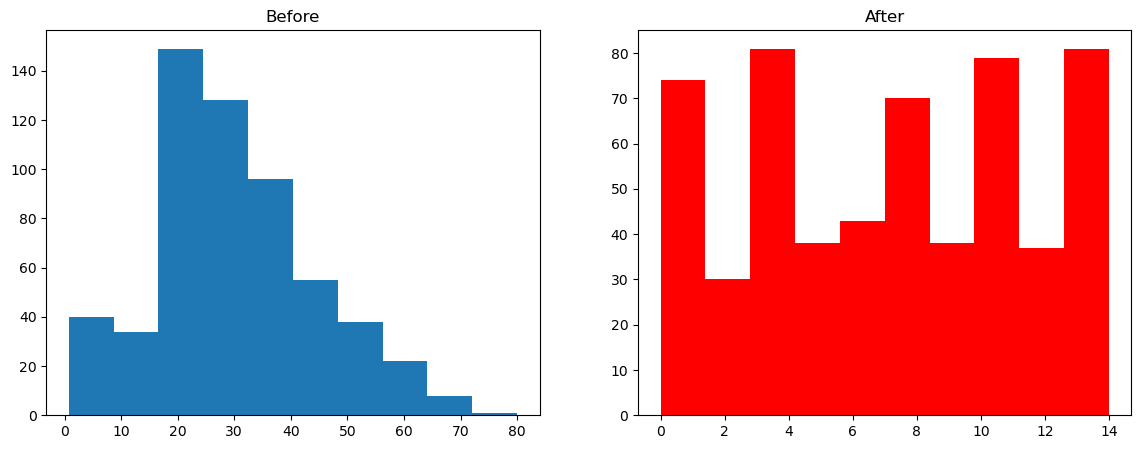

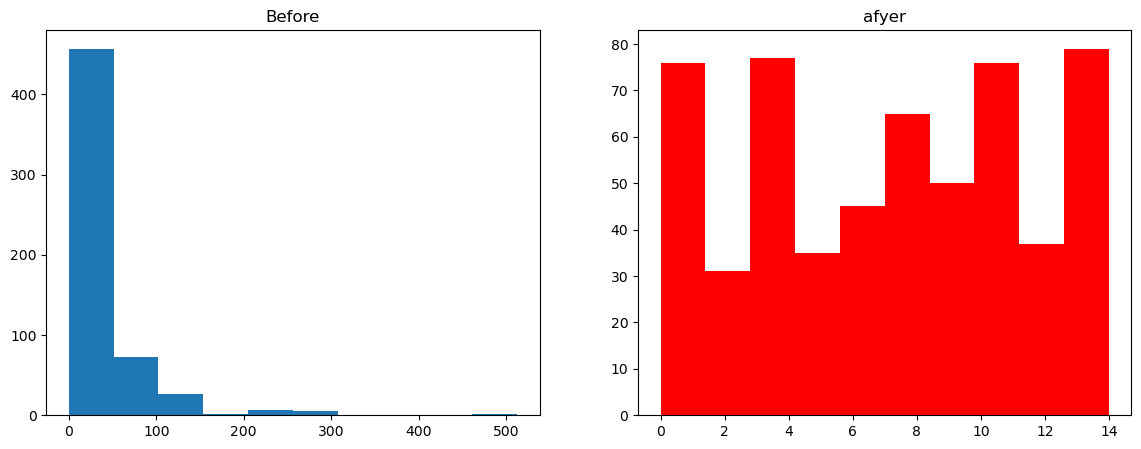

In [125]:
descretize(15, "quantile")

In [129]:
descretize(15,'kmeans')

AttributeError: 'NoneType' object has no attribute 'split'

In [127]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [128]:
def descretize(bins, strategy):
    age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    
    tf = ColumnTransformer(
    [
        ('age', age, [0]),
        ('fare', fare, [1])
    ], remainder = 'passthrough')
    
    xtrainT = tf.fit_transform(X)
    
    accuracy = cross_val_score(DecisionTreeClassifier(), X , y, scoring = 'accuracy')
    print(accuracy)
    
    # plotting
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(xtrain['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(xtrainT[:,0], color = 'red')
    plt.title('After')
    plt.show()
    
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(xtrain['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(xtrainT[:,1], color = 'red')
    plt.title('afyer')
    
    plt.show()

[0.56643357 0.64335664 0.62237762 0.65034965 0.62676056]


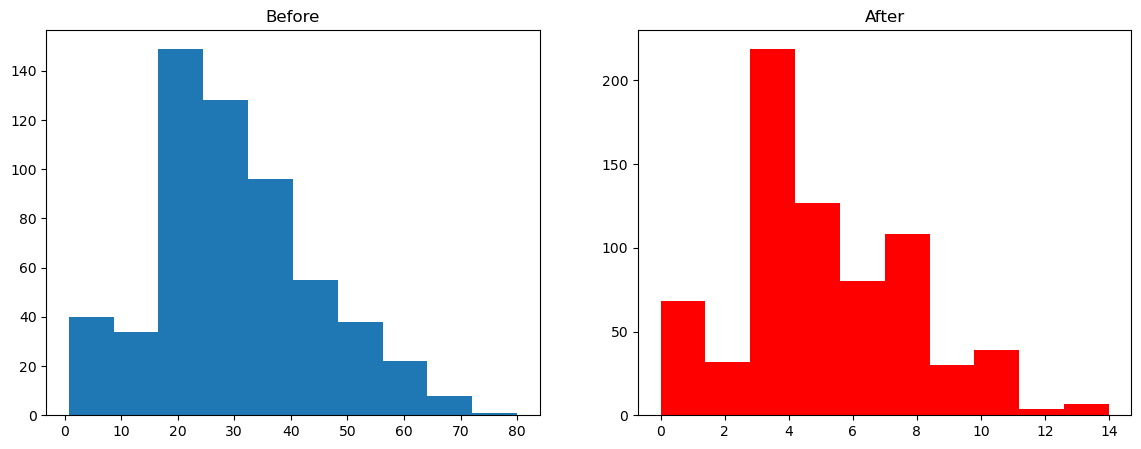

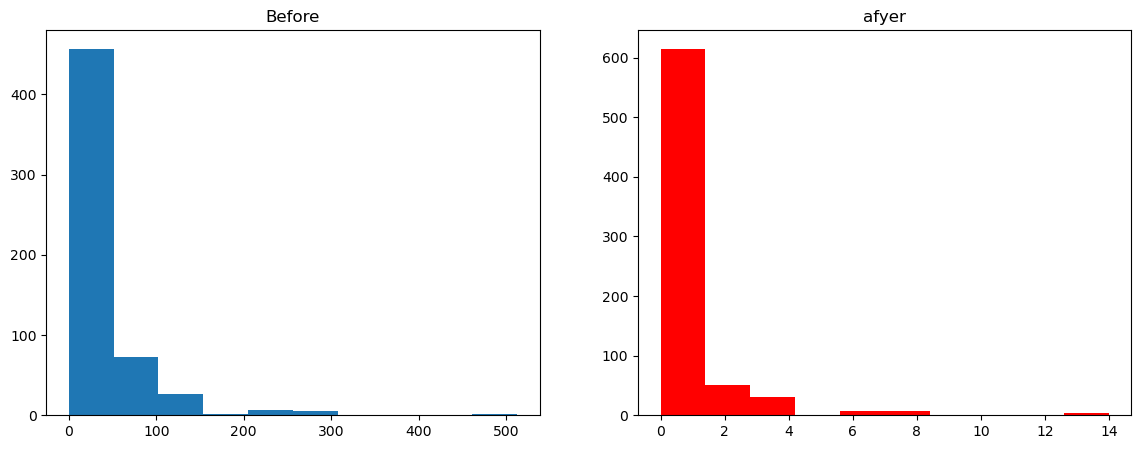

In [130]:
descretize(15, 'uniform')

In [131]:
conda install -c conda-forge openblas


^C

Note: you may need to restart the kernel to use updated packages.


In [132]:
!pip install --upgrade scikit-learn numpy


^C


In [133]:
# couldn't get why kmeans strategy wasn't working

Thanks